In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from seaborn.distributions import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap


#Tổng quan và tiền xử lý dữ liệu

In [ ]:
df=pd.read_csv('/content/drive/Shareddrives/Phân tích dữ liệu với R Python/CUỐI KỲ/221IS2902_DAwP_R_FinalProject_GroupLPT.csv',encoding='unicode_escape')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
#Check null column  
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#Loại bỏ các giá trị null
df=df.dropna()

In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.drop_duplicates().reset_index()

,index,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
# df.reset_index()

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


#Khám phá và xử lý dữ liệu

##Correlation matrix

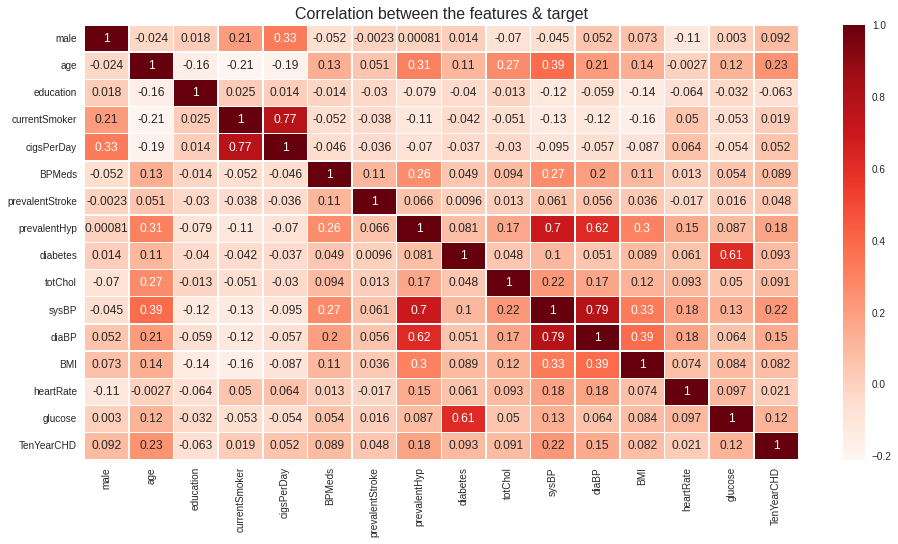

In [ ]:
fig, ax=plt.subplots(figsize=(16,8))
sns.heatmap(data=df.corr(), cmap='Reds', annot=True, linewidths=0.5)
ax.set_title('Correlation between the features & target', fontsize=16)
plt.show();

In [ ]:
#Features Selection
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]

##Phân phối dữ liệu

###Các biến kiểu số

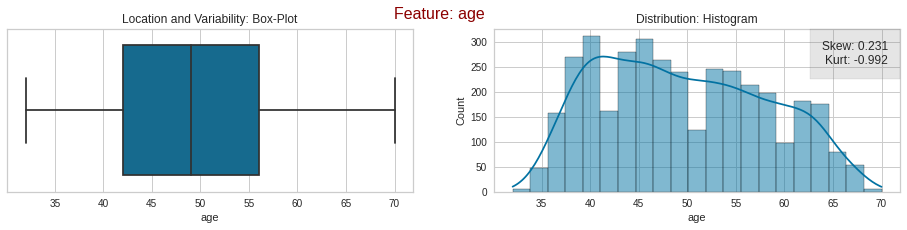

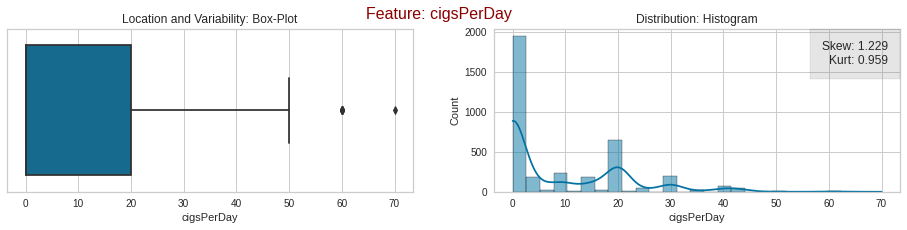

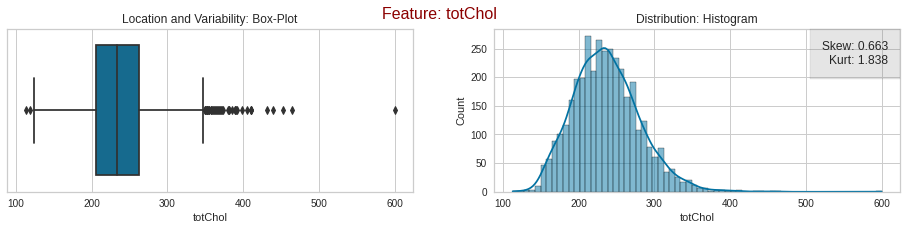

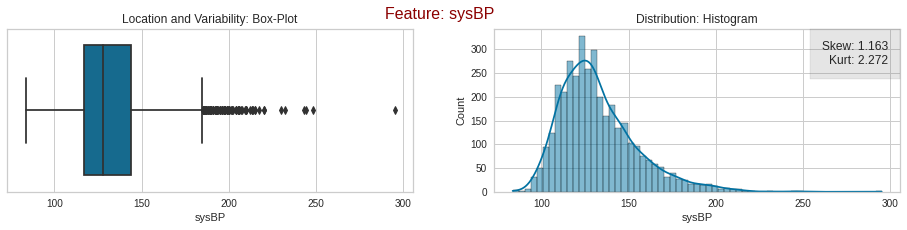

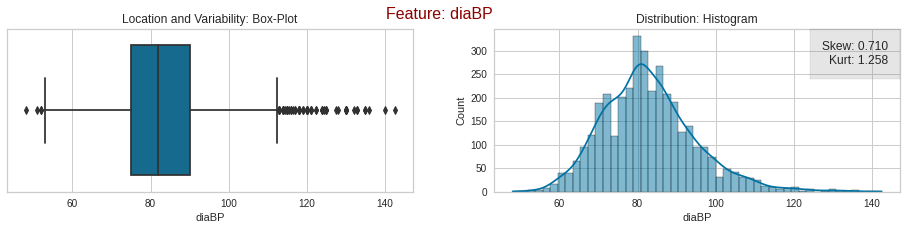

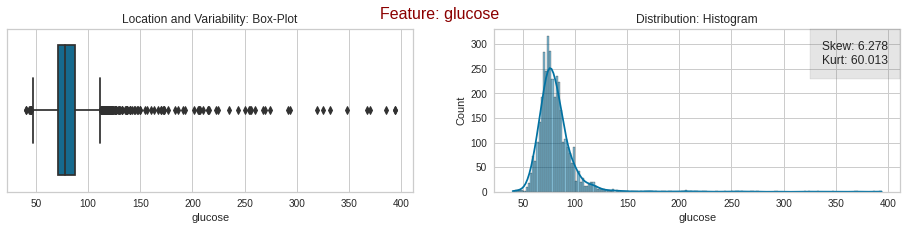

In [ ]:
from scipy.stats.mstats_basic import kurtosis
from scipy.stats import skew
features=['age','cigsPerDay','totChol','sysBP','diaBP','glucose']
target='TenYearCHD'
for feature in features:
  fig, ax=plt.subplots(ncols=2, figsize=(16,3))
  fig.suptitle(f'Feature: {feature}', fontsize=16, color='darkred')

  #Boxplots
  sns.boxplot(data = df[features], x=feature, ax=ax[0]);
  ax[0].set_title('Location and Variability: Box-Plot')

  #Histogram
  sns.histplot(data=df, x=feature, ax=ax[1], kde=True)
  ax[1].set_title('Distribution: Histogram')

  #Counting the stats
  skewness=skew(df[feature])
  kurt=kurtosis(df[feature])

  #Presenting the stats
  ax[1].annotate(s=f'Skew: {skewness:.3f}\n'
                    f'Kurt: {kurt:.3f}',
                 xy=(1,1), xytext=(-12,-12),
                 xycoords='axes fraction', textcoords='offset points',
                 ha='right', va='top',
                 bbox=dict(facecolor='grey', alpha=0.2,pad=12))
  plt.show();

###Các biến phân loại

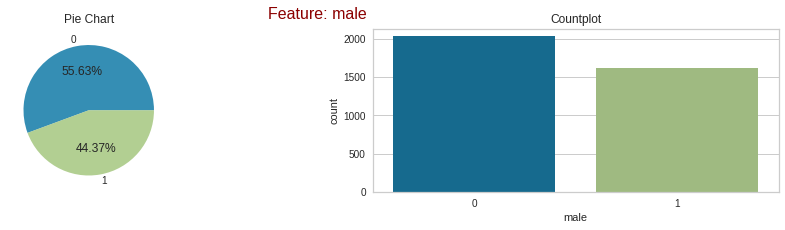

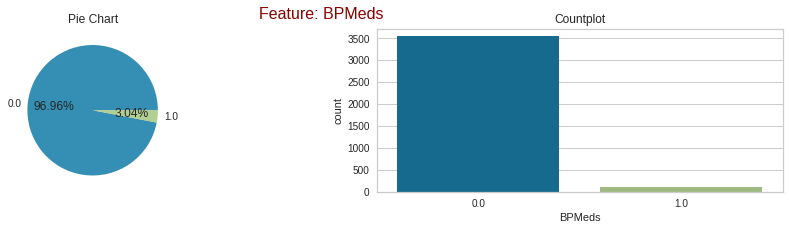

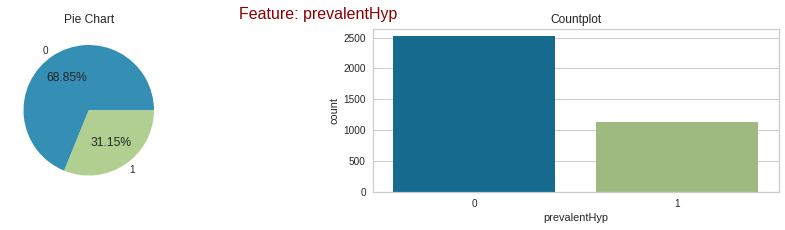

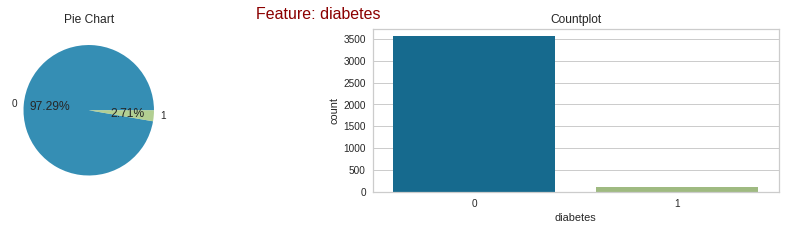

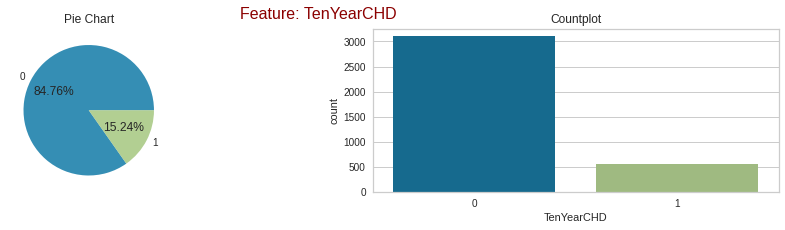

In [ ]:
features=['male','BPMeds','prevalentHyp','diabetes','TenYearCHD']
for feature in features:
  fig, ax=plt.subplots(ncols=2, figsize=(16,3))
  fig.suptitle(f'Feature: {feature}', fontsize=16, color='darkred')

  #Pie-chart
  plt.subplot(1, 2, 1)
  plt.title('Pie Chart' )
  sort=df[feature].unique()
  sort.sort()
  plt.pie(df[feature].value_counts(),
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',labels=sort)

  #Countplot
  sns.countplot(x = feature, data = df, ax=ax[1])
  ax[1].set_title('Countplot')


### Các thuộc tính ảnh hưởng ntn đến khả năng mắc bệnh tim?

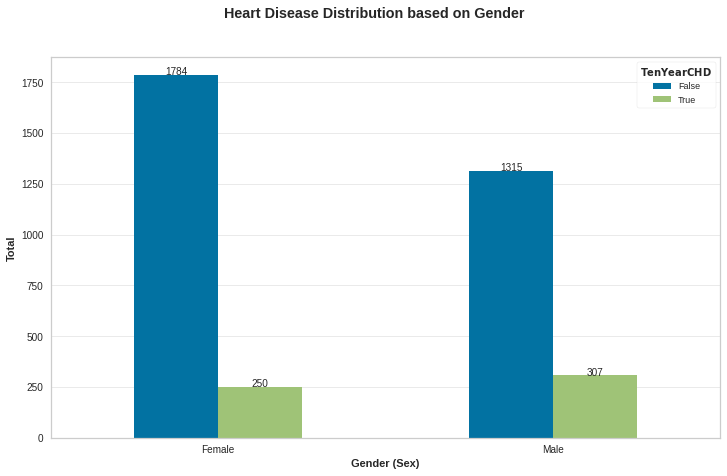

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.male, df.TenYearCHD).plot(kind='bar', figsize=(12, 7))
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy')
plt.xlabel('Gender (Sex)', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{TenYearCHD}$', fontsize='9', 
           title_fontsize='10', loc='upper right', frameon=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


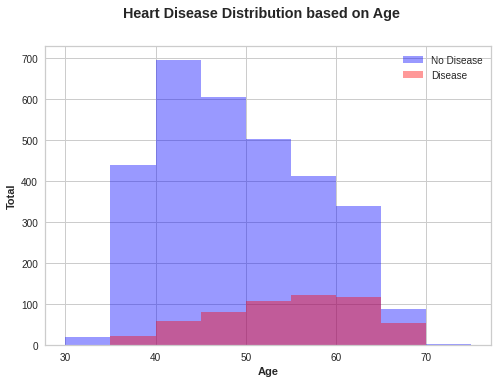

In [ ]:
bins = range(30, 80,5)
ax = sns.distplot(df.age[df.TenYearCHD==0], color='blue', kde=False,bins=bins, label="No Disease")
sns.distplot(df.age[df.TenYearCHD==1], color='red',bins=bins, kde=False, label='Disease')
plt.suptitle('Heart Disease Distribution based on Age', fontweight='heavy')
plt.xlabel('Age', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.legend();

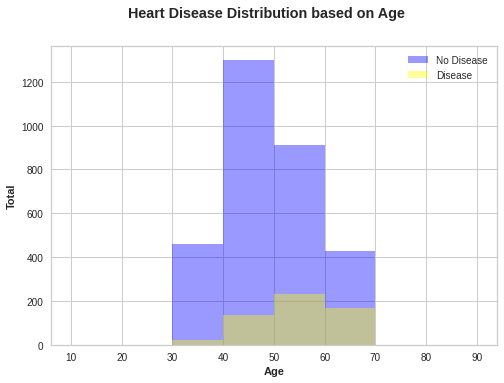

In [ ]:
bins = range(10, 100,10)
ax = sns.distplot(df.age[df.TenYearCHD==0], color='blue', kde=False,bins=bins, label="No Disease")
sns.distplot(df.age[df.TenYearCHD==1], color='yellow',bins=bins, kde=False, label='Disease')
plt.suptitle('Heart Disease Distribution based on Age', fontweight='heavy')
plt.xlabel('Age', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.legend();

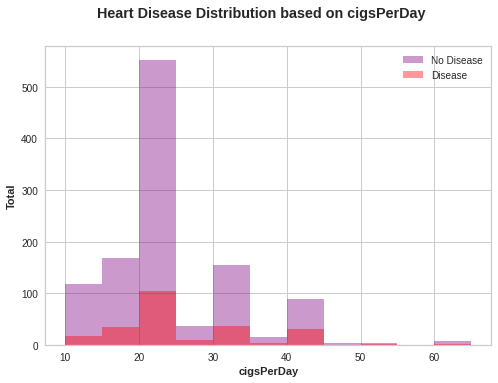

In [ ]:
bins = range(10, 70,5)
ax = sns.distplot(df.cigsPerDay[df.TenYearCHD==0], color='purple', kde=False,bins=bins, label="No Disease")
sns.distplot(df.cigsPerDay[df.TenYearCHD==1], color='red',bins=bins, kde=False, label='Disease')
plt.suptitle('Heart Disease Distribution based on cigsPerDay', fontweight='heavy')
plt.xlabel('cigsPerDay', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.legend();

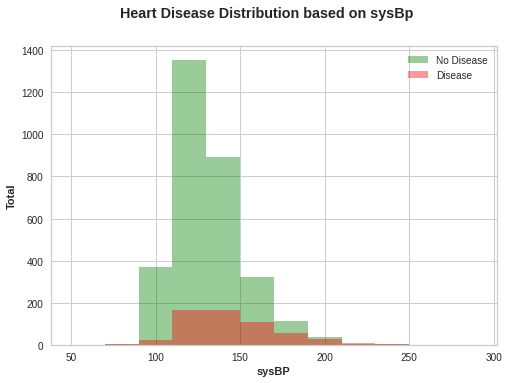

In [ ]:
bins = range(50, 300,20)
ax = sns.distplot(df.sysBP[df.TenYearCHD==0], color='green', kde=False,bins=bins, label="No Disease")
sns.distplot(df.sysBP[df.TenYearCHD==1], color='red',bins=bins, kde=False, label='Disease')
plt.suptitle('Heart Disease Distribution based on sysBp', fontweight='heavy')
plt.xlabel('sysBP', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.legend();

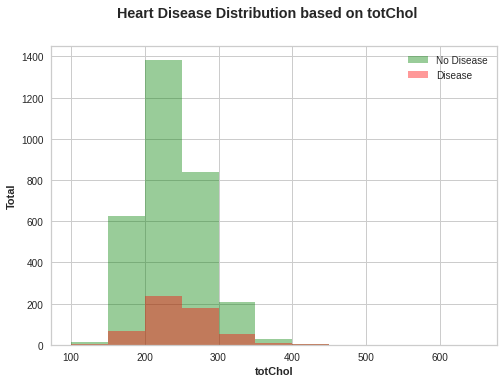

In [ ]:
bins = range(100, 700, 50)
ax = sns.distplot(df.totChol[df.TenYearCHD==0], color='green', kde=False,bins=bins, label="No Disease")
sns.distplot(df.totChol[df.TenYearCHD==1], color='red',bins=bins, kde=False, label='Disease')
plt.suptitle('Heart Disease Distribution based on totChol', fontweight='heavy')
plt.xlabel('totChol', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.legend();

Tỷ lệ TotChol k ảnh hưởng

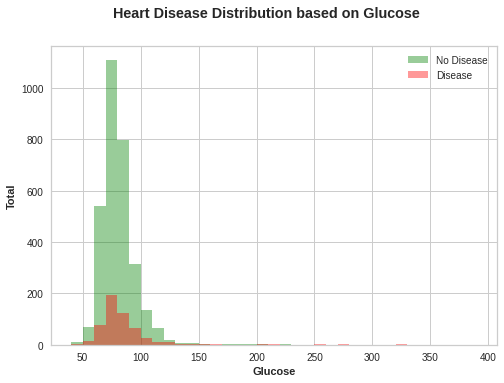

In [ ]:
bins = range(40, 400,10)
ax = sns.distplot(df.glucose[df.TenYearCHD==0], color='green', kde=False,bins=bins, label="No Disease")
sns.distplot(df.glucose[df.TenYearCHD==1], color='red',bins=bins, kde=False, label='Disease')
plt.suptitle('Heart Disease Distribution based on Glucose', fontweight='heavy')
plt.xlabel('Glucose', fontweight='bold', )
plt.ylabel('Total', fontweight='bold')
plt.legend();

Tỷ lệ glucose k ảnh hưởng

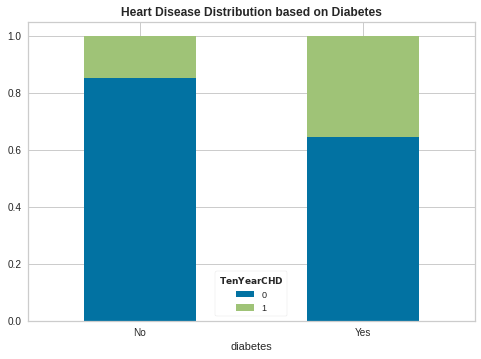

In [ ]:
labels = ['0', '1']
label_diabetes = np.array([0, 1])
label_diabetes2 = ['No', 'Yes']

df_diabetes = pd.crosstab(df['diabetes'],df['TenYearCHD'])
df_diabetes_norm = df_diabetes.div(df_diabetes.sum(1).astype(float), axis=0)
ax=df_diabetes_norm.plot.bar(stacked=True);
plt.xticks(label_diabetes, label_diabetes2, rotation=0)
ax.set_title('Heart Disease Distribution based on Diabetes', fontweight='heavy')

plt.legend(labels=labels, title='$\\bf{TenYearCHD}$', fontsize='9', 
           title_fontsize='9', frameon=True);

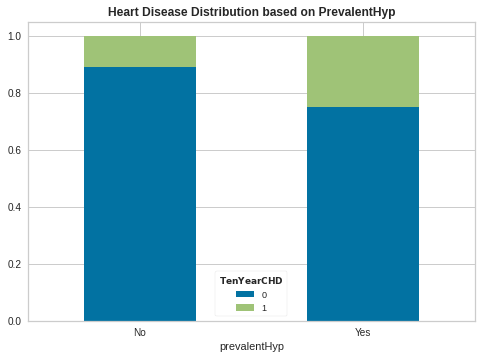

In [ ]:
labels = ['0', '1']
label_prevalentHyp = np.array([0, 1])
label_prevalentHyp2 = ['No', 'Yes']

df_prevalentHyp = pd.crosstab(df['prevalentHyp'],df['TenYearCHD'])
df_prevalentHyp_norm = df_prevalentHyp.div(df_prevalentHyp.sum(1).astype(float), axis=0)
ax=df_prevalentHyp_norm.plot.bar(stacked=True);

plt.xticks(label_prevalentHyp, label_prevalentHyp2, rotation=0)

ax.set_title('Heart Disease Distribution based on PrevalentHyp', fontweight='heavy')

plt.legend(labels=labels, title='$\\bf{TenYearCHD}$', fontsize='9', 
           title_fontsize='9', frameon=True);

##Resample data

In [ ]:
df['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.utils import resample
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [ ]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [ ]:
target=pd.concat([target0,target1])
df=target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6198 entries, 0 to 4199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sysBP         6198 non-null   float64
 1   glucose       6198 non-null   float64
 2   age           6198 non-null   int64  
 3   totChol       6198 non-null   float64
 4   cigsPerDay    6198 non-null   float64
 5   diaBP         6198 non-null   float64
 6   prevalentHyp  6198 non-null   int64  
 7   diabetes      6198 non-null   int64  
 8   BPMeds        6198 non-null   float64
 9   male          6198 non-null   int64  
 10  TenYearCHD    6198 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 581.1 KB


##Remove Outliers

In [ ]:
z = np.abs(stats.zscore(df))
z

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,1.238070,0.239364,1.439356,0.999338,0.779451,1.106946,0.808506,0.205868,0.217923,1.025163,1.0
1,0.645142,0.270514,0.626317,0.208388,0.779451,0.284450,0.808506,0.205868,0.217923,0.975454,1.0
2,0.388206,0.457413,0.394020,0.098594,0.819118,0.359222,0.808506,0.205868,0.217923,1.025163,1.0
4,0.289385,0.009835,0.626317,0.976940,1.058904,0.060133,0.808506,0.205868,0.217923,0.975454,1.0
5,1.687042,0.445934,0.974762,0.274703,0.779451,1.883950,1.236849,0.205868,0.217923,0.975454,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4199,0.170799,0.768913,1.115910,0.669519,0.779451,0.134905,0.808506,0.205868,0.217923,0.975454,1.0
2343,1.079955,0.363964,1.671653,0.559726,0.779451,0.920015,0.808506,0.205868,0.217923,1.025163,1.0
2806,0.343072,1.473882,0.045575,0.626041,0.419476,0.313729,0.808506,0.205868,0.217923,1.025163,1.0
4199,0.170799,0.768913,1.115910,0.669519,0.779451,0.134905,0.808506,0.205868,0.217923,0.975454,1.0


In [ ]:
np.where(z>3)

(array([  11,   25,   25,   38,   46,   46,   69,  113,  116,  178,  183,
         187,  214,  232,  236,  243,  253,  264,  314,  317,  321,  326,
         418,  423,  423,  441,  478,  481,  507,  524,  526,  549,  567,
         574,  643,  652,  747,  756,  765,  775,  780,  808,  830,  843,
         859,  859,  864,  897,  897,  915,  920,  920,  946,  973,  991,
        1056, 1059, 1068, 1073, 1088, 1134, 1140, 1146, 1260, 1284, 1293,
        1298, 1322, 1356, 1360, 1360, 1361, 1388, 1395, 1398, 1419, 1426,
        1452, 1452, 1456, 1457, 1475, 1475, 1521, 1525, 1567, 1580, 1581,
        1608, 1650, 1653, 1672, 1680, 1723, 1741, 1751, 1751, 1781, 1795,
        1799, 1802, 1826, 1826, 1829, 1833, 1870, 1874, 1904, 1910, 1934,
        1950, 1950, 1981, 2009, 2027, 2043, 2069, 2071, 2080, 2086, 2094,
        2114, 2114, 2135, 2160, 2171, 2184, 2184, 2189, 2223, 2249, 2263,
        2263, 2283, 2286, 2289, 2330, 2359, 2371, 2409, 2423, 2435, 2445,
        2475, 2527, 2527, 2540, 2590, 

In [ ]:
np.where(z<-3)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df_new=df[(z <3).all(axis=1)].reset_index()
df_new.drop(['index'], axis=1, inplace=True)
df_new

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0
4,180.0,99.0,43,228.0,0.0,110.0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5583,133.0,60.0,61,271.0,0.0,83.0,0,0,0.0,0,1
5584,110.0,73.0,37,266.0,0.0,72.5,0,0,0.0,1,1
5585,146.0,132.0,51,212.0,15.0,89.0,0,0,0.0,1,1
5586,133.0,60.0,61,271.0,0.0,83.0,0,0,0.0,0,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588 entries, 0 to 5587
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sysBP         5588 non-null   float64
 1   glucose       5588 non-null   float64
 2   age           5588 non-null   int64  
 3   totChol       5588 non-null   float64
 4   cigsPerDay    5588 non-null   float64
 5   diaBP         5588 non-null   float64
 6   prevalentHyp  5588 non-null   int64  
 7   diabetes      5588 non-null   int64  
 8   BPMeds        5588 non-null   float64
 9   male          5588 non-null   int64  
 10  TenYearCHD    5588 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 480.3 KB


##Scaling Data

In [ ]:
scaler=MinMaxScaler().fit_transform(df_new)
scaler

array([[0.17509728, 0.30081301, 0.18918919, ..., 0.        , 1.        ,
        0.        ],
       [0.29182879, 0.29268293, 0.37837838, ..., 0.        , 0.        ,
        0.        ],
       [0.34241245, 0.24390244, 0.43243243, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.48638132, 0.74796748, 0.51351351, ..., 0.        , 1.        ,
        1.        ],
       [0.38521401, 0.16260163, 0.78378378, ..., 0.        , 0.        ,
        1.        ],
       [0.38521401, 0.16260163, 0.78378378, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
df_final=pd.DataFrame(scaler, columns=df_new.columns)
df_final

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,0.175097,0.300813,0.189189,0.315385,0.000000,0.289474,0.0,0.0,0.0,1.0,0.0
1,0.291829,0.292683,0.378378,0.526923,0.000000,0.434211,0.0,0.0,0.0,0.0,0.0
2,0.342412,0.243902,0.432432,0.507692,0.444444,0.421053,0.0,0.0,0.0,1.0,0.0
3,0.361868,0.365854,0.378378,0.661538,0.511111,0.473684,0.0,0.0,0.0,0.0,0.0
4,0.750973,0.479675,0.297297,0.442308,0.000000,0.815789,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5583,0.385214,0.162602,0.783784,0.607692,0.000000,0.460526,0.0,0.0,0.0,0.0,1.0
5584,0.206226,0.268293,0.135135,0.588462,0.000000,0.322368,0.0,0.0,0.0,1.0,1.0
5585,0.486381,0.747967,0.513514,0.380769,0.333333,0.539474,0.0,0.0,0.0,1.0,1.0
5586,0.385214,0.162602,0.783784,0.607692,0.000000,0.460526,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_final['TenYearCHD'].value_counts()

0.0    2929
1.0    2659
Name: TenYearCHD, dtype: int64

#Xây dựng mô hình đự đoán


##Train & Test

In [ ]:
df_train, df_test= train_test_split(df_final, train_size=0.8, test_size=0.2,random_state=42)

In [ ]:
#split feature and target
x_train=df_train.drop(['TenYearCHD'], axis=1)
y_train=df_train['TenYearCHD']
x_test=df_test.drop(['TenYearCHD'], axis=1)
y_test=df_test['TenYearCHD']

In [ ]:
df_test

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
4162,0.276265,0.390244,0.324324,0.446154,0.000000,0.361842,0.0,0.0,0.0,0.0,1.0
3045,0.603113,0.186992,0.621622,0.380769,0.000000,0.486842,1.0,0.0,0.0,0.0,1.0
79,0.221790,0.300813,0.108108,0.373077,0.000000,0.493421,0.0,0.0,0.0,1.0,0.0
167,0.392996,0.292683,0.351351,0.511538,0.000000,0.434211,0.0,0.0,0.0,0.0,0.0
453,0.221790,0.178862,0.108108,0.334615,0.000000,0.368421,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2722,0.365759,0.211382,0.216216,0.300000,0.444444,0.197368,0.0,0.0,0.0,1.0,0.0
5407,0.159533,0.178862,0.216216,0.342308,0.666667,0.368421,0.0,0.0,0.0,0.0,1.0
1598,0.252918,0.243902,0.378378,0.623077,0.000000,0.532895,0.0,0.0,0.0,0.0,0.0
4487,0.556420,0.243902,0.189189,0.661538,0.000000,0.815789,1.0,0.0,0.0,1.0,1.0


##Logistic Regression

In [ ]:
LRclassifier = LogisticRegression()
LRclassifier.fit(x_train, y_train)
y_pred_LR = LRclassifier.predict(x_test);


In [ ]:

LRAcc = accuracy_score(y_pred_LR, y_test)
LRPre=precision_score(y_pred_LR, y_test)
LRRecall=recall_score(y_pred_LR, y_test)
LRF1=f1_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 70.39% .:.


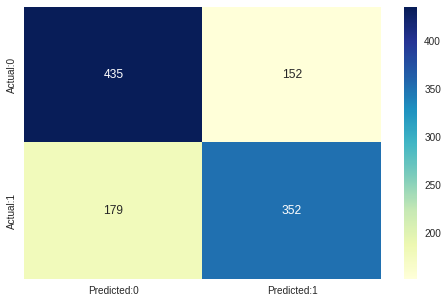

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_LR)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))


.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       587
         1.0       0.70      0.66      0.68       531

    accuracy                           0.70      1118
   macro avg       0.70      0.70      0.70      1118
weighted avg       0.70      0.70      0.70      1118



##Random Forest

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

In [ ]:
RFAcc = accuracy_score(y_pred_RF, y_test)
RFPre=precision_score(y_pred_RF, y_test)
RFRecall=recall_score(y_pred_RF, y_test)
RFF1=f1_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 97.76% .:.


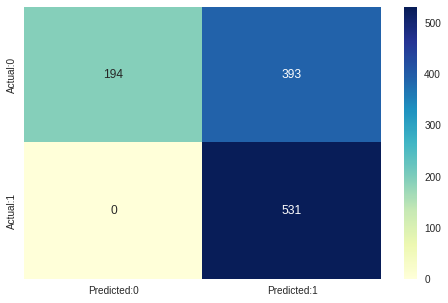

In [ ]:
from sklearn.preprocessing import binarize
y_pred_prob_RF=RFclassifier.predict_proba(x_test)
y_pred_RF2=binarize(y_pred_prob_RF,threshold=0.1)[:,1]
cm2=confusion_matrix(y_test,y_pred_RF2)

conf_matrix=pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

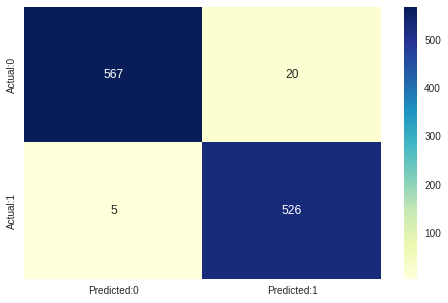

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_RF)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))


.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       587
         1.0       0.96      0.99      0.98       531

    accuracy                           0.98      1118
   macro avg       0.98      0.98      0.98      1118
weighted avg       0.98      0.98      0.98      1118



##SVM

In [ ]:
# --- Applying SVM ---
SVMclassifier = SVC(probability=True)
SVMclassifier.fit(x_train, y_train)
y_pred_SVM = SVMclassifier.predict(x_test)

In [ ]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
SVMPre=precision_score(y_pred_SVM, y_test)
SVMRecall=recall_score(y_pred_SVM, y_test)
SVMF1=f1_score(y_pred_SVM, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 70.93% .:.


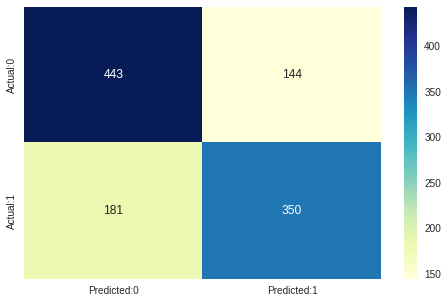

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_SVM)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))


.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       587
         1.0       0.71      0.66      0.68       531

    accuracy                           0.71      1118
   macro avg       0.71      0.71      0.71      1118
weighted avg       0.71      0.71      0.71      1118



#Đánh giá các mô hình

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


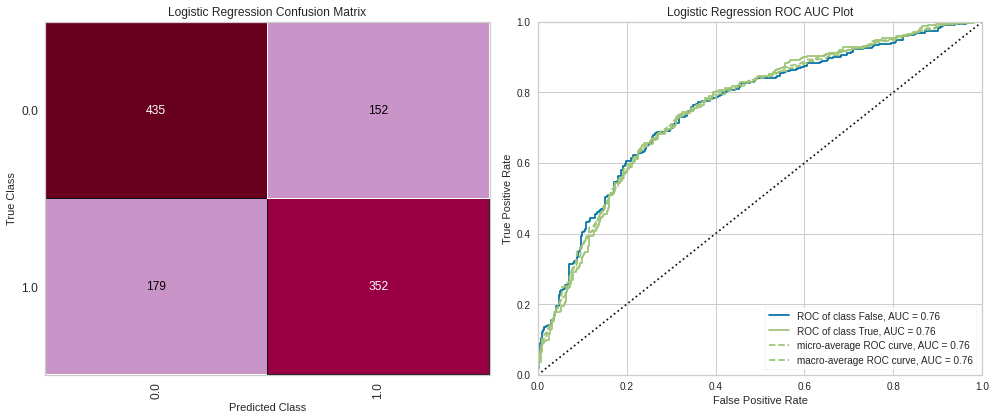

In [ ]:
#Logistics Regression
fig, ax = plt.subplots(ncols=2, figsize=(14,6));
# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax[0], cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---a
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax[1],
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

plt.tight_layout();



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


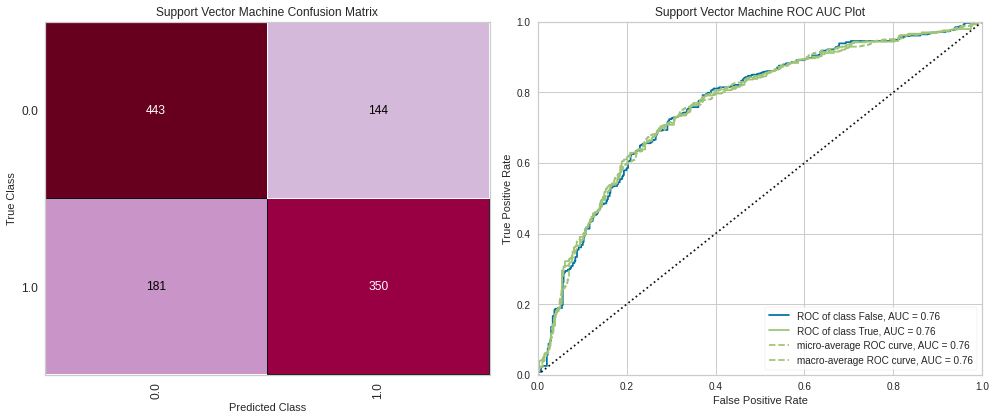

In [ ]:
fig,ax = plt.subplots(ncols=2, figsize=(14, 6))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax[0], cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax[1],
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


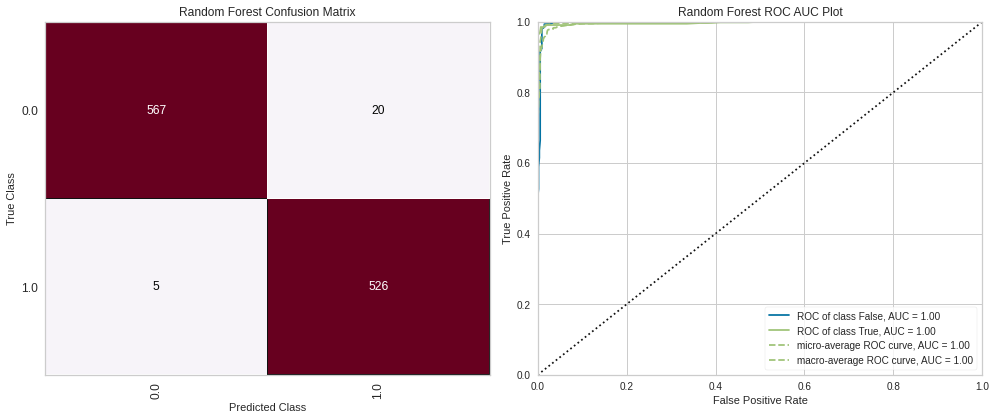

In [ ]:

fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax[0], cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax[1],
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

plt.tight_layout();

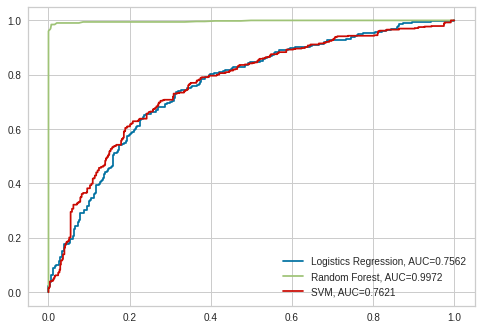

In [ ]:
#Đường cong ROC-AUC
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

# model and plot ROC curve

#Logistics Regression
y_pred = LRclassifier.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistics Regression, AUC="+str(auc))

#Random Forest
y_pred = RFclassifier.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#SVM
y_pred = SVMclassifier.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#add legend
plt.legend();

In [ ]:
#Các chỉ số đánh giá
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','SVM'], 'Accuracy': [LRAcc*100, RFAcc*100,SVMAcc*100], 'Precision': [LRPre, RFPre,SVMPre],
                         'Recall':[LRRecall,RFRecall,SVMRecall], 'F1-Score': [LRF1,RFF1,SVMF1]})
model_ev

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,70.393560,0.662900,0.698413,0.680193
1,Random Forest,97.763864,0.990584,0.963370,0.976787
2,SVM,70.930233,0.659134,0.708502,0.682927


#Predict Case

In [ ]:
data = {'sysBP':105,'glucose':100,'age':50,'totChol':224,'cigsPerDay':20,'diaBP':95,'prevalentHyp':0,'diabetes':0,'BPMeds':0,'male':0}
df2 = df_new.append(data, ignore_index=True)
df2


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39.0,195.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0
1,121.0,76.0,46.0,250.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0
2,127.5,70.0,48.0,245.0,20.0,80.0,0.0,0.0,0.0,1.0,0.0
3,130.0,85.0,46.0,285.0,23.0,84.0,0.0,0.0,0.0,0.0,0.0
4,180.0,99.0,43.0,228.0,0.0,110.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5584,110.0,73.0,37.0,266.0,0.0,72.5,0.0,0.0,0.0,1.0,1.0
5585,146.0,132.0,51.0,212.0,15.0,89.0,0.0,0.0,0.0,1.0,1.0
5586,133.0,60.0,61.0,271.0,0.0,83.0,0.0,0.0,0.0,0.0,1.0
5587,133.0,60.0,61.0,271.0,0.0,83.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data1=MinMaxScaler().fit_transform(df2)
data1

array([[0.17509728, 0.30081301, 0.18918919, ..., 0.        , 1.        ,
        0.        ],
       [0.29182879, 0.29268293, 0.37837838, ..., 0.        , 0.        ,
        0.        ],
       [0.34241245, 0.24390244, 0.43243243, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.38521401, 0.16260163, 0.78378378, ..., 0.        , 0.        ,
        1.        ],
       [0.38521401, 0.16260163, 0.78378378, ..., 0.        , 0.        ,
        1.        ],
       [0.16731518, 0.48780488, 0.48648649, ..., 0.        , 0.        ,
               nan]])

In [ ]:
df_test=pd.DataFrame(data1, columns=df_new.columns)
df_test

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,0.175097,0.300813,0.189189,0.315385,0.000000,0.289474,0.0,0.0,0.0,1.0,0.0
1,0.291829,0.292683,0.378378,0.526923,0.000000,0.434211,0.0,0.0,0.0,0.0,0.0
2,0.342412,0.243902,0.432432,0.507692,0.444444,0.421053,0.0,0.0,0.0,1.0,0.0
3,0.361868,0.365854,0.378378,0.661538,0.511111,0.473684,0.0,0.0,0.0,0.0,0.0
4,0.750973,0.479675,0.297297,0.442308,0.000000,0.815789,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5584,0.206226,0.268293,0.135135,0.588462,0.000000,0.322368,0.0,0.0,0.0,1.0,1.0
5585,0.486381,0.747967,0.513514,0.380769,0.333333,0.539474,0.0,0.0,0.0,1.0,1.0
5586,0.385214,0.162602,0.783784,0.607692,0.000000,0.460526,0.0,0.0,0.0,0.0,1.0
5587,0.385214,0.162602,0.783784,0.607692,0.000000,0.460526,0.0,0.0,0.0,0.0,1.0


In [ ]:
data=df_test.at[5587,'sysBP',]
data

0.38521400778210124

In [ ]:
#Predict Case
# --- Prediction using Gradient Boosting ---
data=[[0.167315,0.487805,0,0.4269223,0.44444,0.4618421,0,0,0,0]]
result = RFclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m');

.:. Heart Disease Not Detected!.:.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
